# Machine Learning Classification Model for Twitter Tweets to Identify Hate Speech

Project created as a part of Out In Tech Mentorship Program, by Andriy Kashyrskyy, with the help of mentor Sean Yun.

The dataset below includes Twitter tweets retrieved from two datasets posted on Kaggle and Github:

- **Dataset 1 link**: Kaggle https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech.
- **Dataset 2 link**: GitHub https://github.com/cs4good/social-good-106-section/tree/master/sentiment-analysis.



We merge two datasets by initially converting one of them from a JSON file to CSV file. The other dataset was originally in a CSV format. We want to merge the two datasets to diversify the training data and make our model initially more exposed to similar data with tweets from different resources.

# Data Preprocessing 

## Data Preprocessing: Dataset #1

### Let's take a look at the training dataset, by looking at its first 5 entries, and the information on types of data it includes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


**There are 31962 entries (tweets) in the Kaggle Dataset!**

#### Note: label '1' denotes that the tweet contains hate speech, and label '0' denotes that the tweet does not contain hate speech. Let's look at the amount of hate and non-hate speech observations in the dataset.

In [4]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

#### As we can see, there are 29,720 non-hate speech tweets, and 2, 242 hate speech tweets.

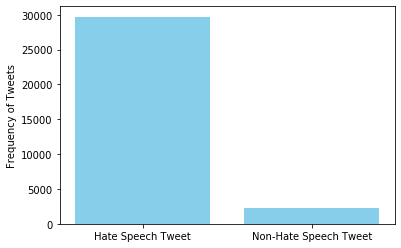

In [5]:
Sentiment_count = df.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'], color="skyblue")
plt.xticks([0,1], ["Hate Speech Tweet", "Non-Hate Speech Tweet"])
plt.ylabel('Frequency of Tweets')
plt.show()

#### Let's also check if there are any missing values of label in the dataset; we do so below by traversing through all the entries in the dataset.

In [6]:
for i in range(len(df)):
    if df['label'][i] != 0 and df['label'][i] != 1:
        print(df['label'][i])
    else:
        continue

#### There are no missing or invalid entries in the label column!

## Data Preprocessing: Dataset #2

#### We convert a JS file to CSV, and we modify the column names and labels (True/False Boolean to 0,1) to match the Dataset #1 and merge the two. This dataset will provide additional 678 entries.

In [7]:
df_extra = pd.read_csv('trainTweets.csv')

In [8]:
df_extra.head()

,classification,tweet
0,True,rt @_makada_ muslim refugee charged with beati...
1,True,rt @_makada_ muslim refugee charged with beati...
2,True,rt @johnkstahlusa there\'s something wrong wit...
3,True,trouble is it\'s all dem-friendly spending pl...
4,True,rt @amike4761 muslim refugees decline work say...


In [9]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 2 columns):
 classification    678 non-null bool
tweet              678 non-null object
dtypes: bool(1), object(1)
memory usage: 6.1+ KB


#### Let's assign the ids to each tweet, and add it as an additional column.

In [10]:
ids = list(range(len(df)+1, len(df)+len(df_extra)+1))
df_extra.insert(0, 'id', ids)

In [11]:
df_extra = df_extra.rename(columns={'id':'id', ' classification':'label', 'tweet':'tweet'})

#### Let's check how many hate and non-hate speech entries we have.

In [12]:
df_extra.label.value_counts()

True     339
False    339
Name: label, dtype: int64

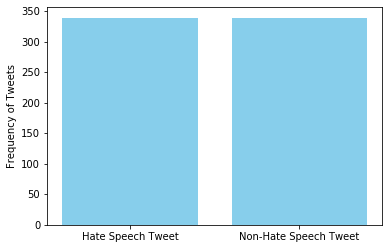

In [13]:
Sentiment_count = df_extra.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'], color="skyblue")
plt.xticks([0,1], ["Hate Speech Tweet", "Non-Hate Speech Tweet"])
plt.ylabel('Frequency of Tweets')
plt.show()

#### There are 339 hate and 339 non-hate speech entries in this dataset. 
#### Let's change the boolean True/False label assignments to 1 and 0 respectively. 

In [14]:
df_extra["label"] = df_extra["label"].astype(int)

In [15]:
df_extra.head(1)

,id,label,tweet
0,31963,1,rt @_makada_ muslim refugee charged with beati...


#### Now we have the same 3 columns as in the other dataset - including id, label, and tweet.

## Merging two datasets:

In [16]:
data = df.append(df_extra, ignore_index=True, verify_integrity=False, sort=False)

In [17]:
data.label.value_counts()

0    30059
1     2581
Name: label, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32640 entries, 0 to 32639
Data columns (total 3 columns):
id       32640 non-null int64
label    32640 non-null int64
tweet    32640 non-null object
dtypes: int64(2), object(1)
memory usage: 765.1+ KB


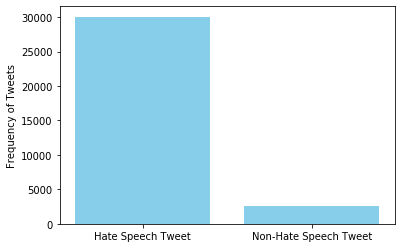

In [19]:
Sentiment_count = data.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'], color="skyblue")
plt.xticks([0,1], ["Hate Speech Tweet", "Non-Hate Speech Tweet"])
plt.ylabel('Frequency of Tweets')
plt.show()

**Time to move on to the next step - exploratory data analysis!**

## Exploratory Data Analysis

### Below we visualize and look into the 
- distributions of lengths of all tweets in total, hate-speech and non-hate speech tweets separately;
- word frequencies using wordclouds.

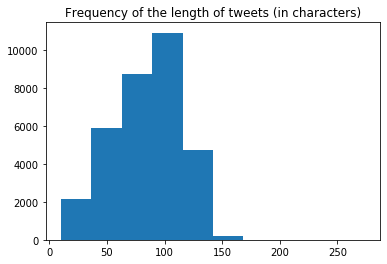

In [20]:
length_tweets = []
for i in range(len(data)):
    length_tweets.append(len(data.tweet[i]))

plt.hist(length_tweets)
plt.title("Frequency of the length of tweets (in characters)")
plt.show()

#### We cal split the dataset into non-hate speech and hate speech to look closer into each of them.

In [21]:
data_hate = data.loc[data.label==1]
data_no_hate = data.loc[data.label==0]

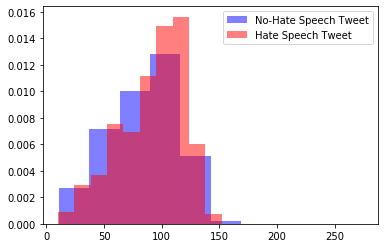

The mean of the length of hate speech tweets is: 91.62 characters
The median of the length of hate speech tweets is: 98.0 characters
---------------------------------------------------
The mean of the length of non-hate speech tweets is: 84.62 characters
The median of the length of non-hate speech tweets is: 88.0 characters


In [22]:
length_tweets_nh = []
length_tweets_h = []

for i in range(len(data_no_hate)):
    length_tweets_nh.append(len(data_no_hate.tweet.iloc[i]))

for i in range(len(data_hate)):
    length_tweets_h.append(len(data_hate.tweet.iloc[i]))

plt.hist(length_tweets_nh, density=True, alpha=0.5, color="blue") + plt.hist(length_tweets_h, density=True, alpha=0.5, color="red")
plt.legend(["No-Hate Speech Tweet", "Hate Speech Tweet"])
plt.show()

print("The mean of the length of hate speech tweets is:", round(np.mean(length_tweets_h), 2), "characters")
print("The median of the length of hate speech tweets is:", round(np.median(length_tweets_h), 2), "characters")
print("---------------------------------------------------")
print("The mean of the length of non-hate speech tweets is:", round(np.mean(length_tweets_nh), 2), "characters")
print("The median of the length of non-hate speech tweets is:", round(np.median(length_tweets_nh), 2), "characters")

#### We can note that the histograms of two groups are similarly distributed, however additional test (e.g. hypothesis testing) is needed to find if there are any statistically significant differences between the two groups.

### Tokenization

**The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words, and it breaks the raw text into word called tokens.**

#### Let's tokenize all of the words in the tweek column, utilizing NLTK package in Python, and let's also lowercase all of the words (since "A" and "a" are treated differently in ASCII code, however this is distinction is not relevant in our context).

In [23]:
import nltk
from nltk.tokenize import word_tokenize 

data['tweet_token'] = data['tweet'].apply(lambda x: word_tokenize(x.lower()))

#### This is what the column of the tweets looks like after tokenization:

In [24]:
data.loc[data.label==1, 'tweet_token']

13       [@, user, #, cnn, calls, #, michigan, middle, ...
14       [no, comment, !, in, #, australia, #, opkillin...
17                            [retweet, if, you, agree, !]
23       [@, user, @, user, lumpy, says, i, am, a, ., p...
34       [it, 's, unbelievable, that, in, the, 21st, ce...
                               ...                        
32296    [yeah, yeah, yeah, ., ., poor, you, ., ., ., y...
32297    [@, foxnews, @, love_the_donald, how, about, f...
32298                 [bitch, you, look, like, a, refugee]
32299    [this, is, not, the, idea, for, refugees, who,...
32300    [#, sanctuarycities, ethiopian, \'refugee\, ',...
Name: tweet_token, Length: 2581, dtype: object

### Stopwords removal

#### We see that some entries are invalid (with some fun-looking special signs present). Let's remove all of these stopwords using NLTK stopwords application.

In [25]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [26]:
data['token_clean'] = data['tweet_token'].apply(lambda x: [w for w in x if w not in stop_words])
data.head()

,id,label,tweet,tweet_token,token_clean
0,1,0,@user when a father is dysfunctional and is s...,"[@, user, when, a, father, is, dysfunctional, ...","[@, user, father, dysfunctional, selfish, drag..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[@, user, @, user, thanks, for, #, lyft, credi...","[@, user, @, user, thanks, #, lyft, credit, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the...","[#, model, love, u, take, u, time, urð±, !, ..."
4,5,0,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[factsguide, :, society, #, motivation]"


#### Let's remove punctuation, by implementing a function that will store the entry it it is not in list of punctuation.

In [27]:
import string

# creating a list of punctuation characters

list_punctuation = []
for ch in string.punctuation:
    list_punctuation.append(ch)

In [28]:
data['token_cleaner'] = data['token_clean'].apply(lambda x: [w for w in x if w not in list_punctuation])
data['token_cleaner']

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, ca, n't, us...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
32635    [eus, treatment, lone, children, one, shameful...
32636    [rt, chakerkhazaal, einstein, refugee, world, ...
32637    [rt, ticley, god, help, poor, refugees, frump,...
32638    [success, refugee, neurobiologist, arrived, sw...
32639    [rt, hasasimo, syria, refugee, helps, fulfill,...
Name: token_cleaner, Length: 32640, dtype: object

#### A bit more cleaning required. Let's remove the special characters outside punctuation list that we didn't expect to see!


In [29]:
import string
data['token_clean_alph'] = data['token_cleaner'].apply(lambda x: [i for i in x if i.isalpha()])
data['token_clean_alph']

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, ca, use, ca...
2                                        [bihday, majesty]
3                          [model, love, u, take, u, time]
4                        [factsguide, society, motivation]
                               ...                        
32635    [eus, treatment, lone, children, one, shameful...
32636    [rt, chakerkhazaal, einstein, refugee, world, ...
32637    [rt, ticley, god, help, poor, refugees, frump,...
32638    [success, refugee, neurobiologist, arrived, sw...
32639    [rt, hasasimo, syria, refugee, helps, fulfill,...
Name: token_clean_alph, Length: 32640, dtype: object

**Now our tweets data only contains strings with words, and no special characters or punctuation!**

## Word frequencies 
#### Let's look into word frequencies of the general dataset and its 2 variations with hate and non-hate speech. Thus we create frequency lists of of the entire dataset and it split into hate and non-hate speech parts, mapping each word to the amount of times the word is used across the tweets.

In [30]:
## Entire dictionary
frequency_dict = dict()

for each_tweet in range(len(data['token_clean_alph'])):
    for word in data['token_clean_alph'][each_tweet]:
        if word in frequency_dict: 
            frequency_dict[word] += 1
        else: 
            frequency_dict[word] = 1        

In [31]:
## non-hate dictionary
frequency_dict_nonhate = dict()

for each_tweet in range(len(data.loc[data['label']==0,'token_clean_alph'])):
    for word in data['token_clean_alph'][each_tweet]:
        if word in frequency_dict_nonhate: 
            frequency_dict_nonhate[word] += 1
        else: 
            frequency_dict_nonhate[word] = 1  

In [32]:
## hate speech dictionary
frequency_dict_hate = dict()

for each_tweet in range(len(data.loc[data['label']==1,'token_clean_alph'])):
    for word in data['token_clean_alph'][each_tweet]:
        if word in frequency_dict_hate: 
            frequency_dict_hate[word] += 1
        else: 
            frequency_dict_hate[word] = 1        

### Let's create some wordclouds to see which words are most frequent in the dataset.

In [33]:
from wordcloud import WordCloud

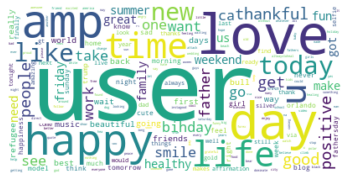

In [34]:
## for all dataset
wordcloud = WordCloud(min_word_length = 2, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

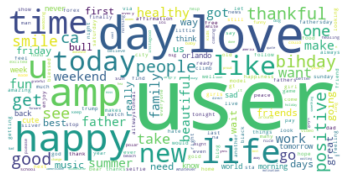

In [35]:
## for non-hate speech tweets
wordcloud = WordCloud(min_word_length = 2, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict_nonhate)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

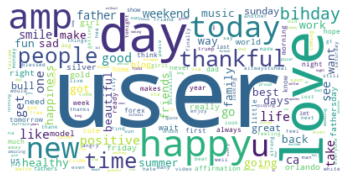

In [36]:
## for hate speech tweets
wordcloud = WordCloud(min_word_length = 2, background_color='white')
wordcloud.generate_from_frequencies(frequency_dict_hate)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Based on the observations of wordclous and histrograms above we want to delete the entries with - "user", "like", "via", and combine entries like rt and reetweet.

In [37]:
keys_to_be_deleted = ['user', 'like', 'via']

for i in keys_to_be_deleted:
    if i in frequency_dict:
        del frequency_dict[i]
    else:
        print(f'Key {i} is not in the dictionary')

### Stemming

We use apply stemming, the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. We user PorterStemmer application from NLTK.

In [38]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
data['words_stemmed'] = data['token_clean_alph'].apply(lambda x: [ps.stem(i) for i in x])

We assign the value of y to the entries in a column of labels, as it will be needed for further machine learning model definition.

In [39]:
y = data['label']

### Vectorization

In order to use this textual data in machine learning analysis, we need to vectorize it (present it in a form of a numerical vector). We use the application of TfidfVectorizer from sklearn library in Python.

For the purposes of our analysis, we input the parameter values for the tfidf - max_df (ignore terms that have a document frequency strictly higher than the given threshold) as 0.9, min_df (ignore terms that have a document frequency strictly lower than the given threshold) as 23, and max_features (the top maximum features) as 3000. 

We also specify token_pattern to get rid of special characters that prior data cleaning did not account for!

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun, max_df = 0.9, min_df = 23, max_features = 3000, token_pattern = '[a-z]+\w*')  

In [41]:
docs = data['words_stemmed']
tfidf.fit(docs)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=3000,
                min_df=23, ngram_range=(1, 1), norm='l2',
                preprocessor=<function dummy_fun at 0x7fed03c1a9e0>,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='[a-z]+\\w*',
                tokenizer=<function dummy_fun at 0x7fed03c1a9e0>, use_idf=True,
                vocabulary=None)

In [42]:
tfidf.transform(docs)

<32640x1554 sparse matrix of type '<class 'numpy.float64'>'
	with 173904 stored elements in Compressed Sparse Row format>

In [43]:
# Uncomment the cell below to view the Tfidf vocabulary.
# tfidf.vocabulary_

Let's create a dataframe for the entries of Tfidf vocabulary.

In [44]:
df = pd.DataFrame(data = tfidf.fit_transform(docs).toarray(), columns=tfidf.get_feature_names())

In [45]:
df.shape

(32640, 1554)

**Displaying the vectorized dataset below:**

In [46]:
df.head(10)

,aap,abl,absolut,abt,abus,accept,account,achiev,across,act,...,yet,yo,yoga,york,young,youth,youtub,yr,yum,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**We add a column with hate speech labels.**

In [47]:
df["hate_speech"] = y

In [48]:
df.head()

,aap,abl,absolut,abt,abus,accept,account,achiev,across,act,...,yo,yoga,york,young,youth,youtub,yr,yum,yummi,hate_speech
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Dividing the data into training and testing datasets

We will divide our data into training and testing, with 0.8 ratio (80% for training, 20% for testing).

In [49]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=123)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 26112
No. of testing examples: 6528


There will be 26112 observations in our training dataset, and 6528 observations in our testing dataset.

# Training models (Logistic Regression, Decision Tree, Random Forest, Multinomial Naive Bayes, anb SVM).

### Using Hyperparameter tuning and Cross-Validation

In [50]:
from sklearn.model_selection import GridSearchCV

For each of the machine learning models we have to input slightly different parameters, however, instead of applying our own values that can be subjective we can utilize hyperparameter tuning and cross validation that will find the optimal values for hyperparameters, using GridSearchCV.

### Using ROC Curve Metric

In [51]:
import numpy as np 
from sklearn import metrics

The ROC curve (Receiver Operating Characteristics Curve) is a metric used to measure the performance of a classifier model. It depicts the rate of true positives with respect to the rate of false positives, highlighting the sensitivity of the classifier model. We will be using this metric's Area Under the Curve (AUC) score to evaluate each of the models we create. As a rule of thumb, an AUC score above 0.85 means high classification accuracy, one between 0.75 and 0.85 moderate accuracy, and one less than 0.75 low accuracy (D' Agostino, Rodgers, & Mauck, 2018).

### Training a Logistic Regression model 

We apply the Logistic Regression, a supervised learning technique, to predict the categorical dependent variable using a given set of independent variables from our vectorized dataset. We computationally estimate the probabilities using logistic regression equation, which helps predict the likelihood of the tweet to involve hate speech, for each of the text entries.

In [52]:
from sklearn.linear_model import LogisticRegression

**Hyperparameter tuning, Cross-Validation:**

We are tuning hyperparameters of *penalty*, *C*, and *solver*.

In [53]:
parameters = {'penalty':('l1', 'l2'), 'C':np.logspace(-2, 2, 5), 'solver':['liblinear']}

In [54]:
clf = GridSearchCV(LogisticRegression(), param_grid = parameters, cv = 5, verbose=True)

In [55]:
## splitting into x and y variables for the Logistic Regression
X_train = training_data.iloc[:,:-1] 
y_train = training_data['hate_speech']

In [56]:
X_test = testing_data.iloc[:,:-1] 
y_test = testing_data['hate_speech']

In [60]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ('l1', 'l2'), 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

Due to raised code errors in later analysis of linear regression coefficients, we manually input the hyperparameters for the Logistic Regression (by transfering the ones from clf to lr).

In [61]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

In [62]:
# fitting
lr.fit(X_train, y_train)

/Users/andriykashyrskyy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
# predicting
lr_predicted = lr.predict(X = X_test)

**What do the coefficients of logistic regression tell us?**

Let's explore the coefficients of the logistic regression model to then look which text entries (words) correlate with being classified as hate and non-hate tweets.

In [76]:
print('N of positive coefficients:', sum(lr.coef_[0] > 0))
print('N of negative coefficients:', sum(lr.coef_[0] < 0))

N of positive coefficients: 594
N of negative coefficients: 960


Let's create a dataframe to explore the columns of entries with the coefficients assigned to them.

In [77]:
## convert to a pandas dataframe, sort with higher coefficients
X_train.columns 
d = {'coef': lr.coef_[0], 'columns': X_train.columns}
dataframe = pd.DataFrame(data=d)

In [78]:
neg_coefs = dataframe.sort_values(by='coef', ascending=True).head(15)
neg_coefs

,coef,columns
345,-4.330026,day
791,-3.135971,life
139,-3.106448,bihday
625,-3.008524,happi
969,-2.919994,orlando
821,-2.708473,love
1250,-2.561560,smile
640,-2.486552,healthi
1385,-2.255014,today
1488,-2.246320,week


In [79]:
pos_coefs = dataframe.sort_values(by='coef', ascending=True).tail(20)
pos_coefs

,coef,columns
906,2.880605,muslim
432,3.006024,equal
980,3.074257,paladino
1517,3.159770,women
728,3.178851,jew
841,3.215770,malevot
1516,3.231812,woman
152,3.284763,blm
764,3.291400,latest
173,3.318593,boycott


**Inference from the coefficients:**

The highest negative coefficients are represented by entries such as:

In [80]:
print([i for i in neg_coefs['columns']])

['day', 'life', 'bihday', 'happi', 'orlando', 'love', 'smile', 'healthi', 'today', 'week', 'tomorrow', 'weekend', 'beauti', 'friday', 'fun']


We can see that the highest value positive coefficients are represented by entries such as:

In [81]:
print([i for i in pos_coefs['columns']])

['muslim', 'equal', 'paladino', 'women', 'jew', 'malevot', 'woman', 'blm', 'latest', 'boycott', 'obama', 'black', 'refuge', 'bigot', 'libtard', 'trump', 'racist', 'white', 'racism', 'allahsoil']



While the highest negative values indicate being likely representative of the non-hate speech tweets, the positive ones indicate being likely representative of the hate speech tweets. We can see that such entries appear the most in the related types of tweets (negative coefficients in non-hate, and positive coefficients in hate speech tweets).

**ROC curve metric plotting and evaluating**

In [82]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

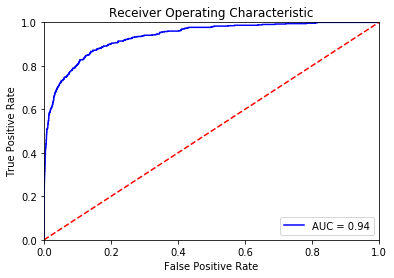

In [83]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_predicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6005
           1       0.90      0.39      0.55       523

    accuracy                           0.95      6528
   macro avg       0.92      0.69      0.76      6528
weighted avg       0.95      0.95      0.94      6528



*Evaluation:* Based on the AUC (area under the curve) score of **0.94**, which is the measure of the ability of a classifier to distinguish between classes, the Logistic Regression performs pretty well. 

### Training a Decision Tree model

A Decision Tree model works like a decision-making diagram, with nodes spanning down a certain number of levels, to classify the entry as 1 or 0 (e.g. hate or non-hate speech tweet). However, it is prone to overfitiing, which make the model perform well for the training data, but not for the testing data. Generally, Decision Tree models give less accurate result than the Random Forest models, though they are more efficient requiring less time and space to run.

In [93]:
from sklearn.tree import DecisionTreeClassifier

We are tuning hyperparameters of *criterion*, *splitter*, and *max_depth*.

In [94]:
parameters = {'criterion':('gini', 'entropy'), 'splitter':['best'], 'max_depth':[4,5,6,7,8,9,10]}

In [95]:
dt = GridSearchCV(DecisionTreeClassifier(), param_grid = parameters, cv = 5, verbose=True)

In [96]:
# fitting
dt.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
               

In [97]:
# best parameters
dt.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

In [98]:
# predicting
dt_predicted = dt.predict(X = X_test)

**ROC curve metric plotting and evaluating**

In [99]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

probs = dt.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

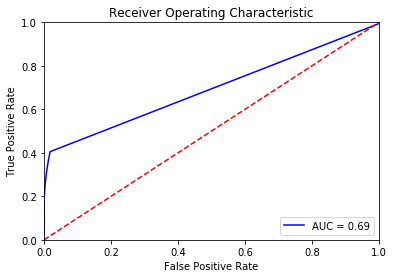

In [100]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
print(classification_report(y_test, dt_predicted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6005
           1       0.89      0.25      0.39       523

    accuracy                           0.94      6528
   macro avg       0.91      0.62      0.68      6528
weighted avg       0.93      0.94      0.92      6528



*Evaluation:* Based on the AUC score of the Decision Tree, which is **0.69**, the model does not perform as well as the Logistic Regression above. This reflects one of the common pitfalls of using the Decision Tree model - it leads to overfitting which negatively affects its ability to model test data.

### Training a Random Forest model

A random forest combines several decision trees, and while it generally runs longer than the decision tree, it ivolves rigorous training and can generalize over the data in a better way. Its randomized feature selection makes it a lot more accurate than a decision tree. It also prevents overfitting since it includes multiple variations of decision trees.

In [107]:
from sklearn.ensemble import RandomForestClassifier

We are tuning hyperparameters of *n_estimators*, *max_depth*, and *criterion*.

In [108]:
parameters = { 'n_estimators': [100,150],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']}

In [109]:
rf = GridSearchCV(RandomForestClassifier(), param_grid = parameters, cv = 5, verbose=True)

In [110]:
# fitting 
rf.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed: 16.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [111]:
# best parameters
rf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 150}

In [112]:
# predicting
rf_predicted = rf.predict(X = X_test)

**ROC curve metric plotting and evaluating**

In [113]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

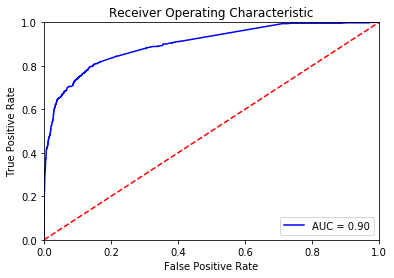

In [114]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [115]:
print(classification_report(y_test, rf_predicted))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6005
           1       1.00      0.07      0.14       523

    accuracy                           0.93      6528
   macro avg       0.96      0.54      0.55      6528
weighted avg       0.93      0.93      0.90      6528



*Evaluation:* As expected, the Random Forest model performs better than the Decision Tree model, given its AUC score is **0.90**. However, it has a lower score than the Logistic Regression model. 

**Note**: This model also performs with **100% *precision rate***, which means it worked perfectly to identify positive class predictions (hate speech tweets) that were indeed hate speech tweets.

### Training a Multinomial Naive Bayes model

We use the Multinomial type of Naive Bayes model as it is applicable to problems in Natural Language Processing, and works within the context of classifying text. It is using term frequency (the number of times a given entry appears in an entire pool of entries), which is normalized by dividing its frequency with the sample size of all entries, and is based on Bayes' theorem - using prior and likelihood to compute the posterior porbability of an event occurring.

In [116]:
from sklearn.naive_bayes import MultinomialNB

We are tuning hyperparameter of *alpha*.

In [117]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001)}

In [118]:
mnb = GridSearchCV(MultinomialNB(), param_grid = parameters, cv = 5, verbose=True)

In [119]:
# fitting
mnb.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [120]:
# best parameters
mnb.best_params_

{'alpha': 0.1}

In [121]:
# predicting
mnb_predicted = mnb.predict(X = X_test)

**ROC curve metric plotting and evaluating**

In [122]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

probs = mnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

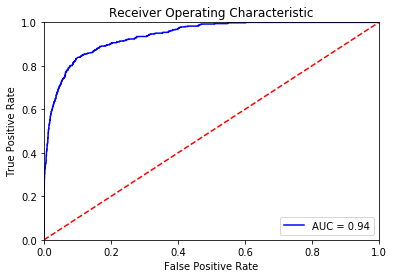

In [123]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [124]:
print(classification_report(y_test, mnb_predicted))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6005
           1       0.84      0.36      0.50       523

    accuracy                           0.94      6528
   macro avg       0.89      0.68      0.74      6528
weighted avg       0.94      0.94      0.93      6528



*Evaluation:* Based on the AUC score above, the Multinomial Naive Bayes model performs similarly to the Logistic Regression model, with the same AUC score of **0.94**. If we compare the precision and recall rates, and f1-score, the Logistic Regression model performs slightly better across all three metrics.

### Training a Support Vector Machine (SVM) model

We apply the support vector machine model, a supervised machile learning model that uses classification algorithms for two-group classification problems. It is effectice in high dimensional spaces, and in case where the number of dimensions if greater than the number of samples we use. This model can be useful in our context, since the vectorized data is multi-dimensional.

In [91]:
from sklearn.svm import SVC

We are tuning hyperparameters of *C*, *gamma*, and *kernel*.

In [92]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid'], 'max_iter':[1], 'probability':[True], 'random_state':[0]}
 
svm = GridSearchCV(SVC(), param_grid, cv = 5, refit = True, verbose = 3)

In [100]:
# fitting the model for grid search
svm.fit(X_train, y_train)

In [94]:
# best parameters after tuning
print(svm.best_params_)
 
# model after hyper-parameter tuning
print(svm.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 1, 'probability': True, 'random_state': 0}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=1,
    probability=True, random_state=0, shrinking=True, tol=0.001, verbose=False)


In [95]:
# predicting 
svm_predicted = svm.predict(X_test)

In [96]:
# classification report
print(classification_report(y_test, svm_predicted))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6005
           1       0.02      0.00      0.00       523

    accuracy                           0.91      6528
   macro avg       0.47      0.50      0.48      6528
weighted avg       0.85      0.91      0.88      6528



**ROC curve metric plotting and evaluating**

In [97]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

probs = svm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

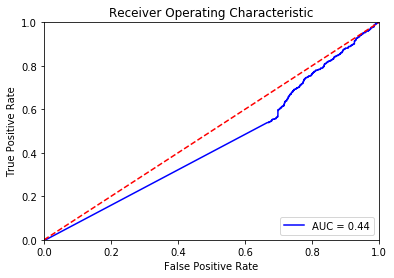

In [98]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

*Evaluation:* Based on the AUC score of 0.44 above, the SVM model performs worst of all models. This might be due to hyperparameter tuning not being conducted for a long enough time; we limit the number of max_iter to 1 in order to run the model more efficiently.

______

## Model Comparison and Drawing Conclusions

As seen from the model evaluations above, the best performing models with AUC scores of **0.94**, which indicates the classifier's ability to distinguish between classes, are **Logistic Regression** and **Multinomial Naive Bayes** models, followed by the **Random Forest** model (AUC score = **0.90**), the **Decision Tree** model (AUC score = **0.69**), and the **Support Vector Machine** Model (AUC score = **0.44**). 

The former two models perform poorly on the testing datasets as compared to the first three models. **Logistic Regression** performed slightly better based on other metrics (precision and recall rates, f1-score) as compared to the **Multinomial Naive Bayes** model. 

However, it is important to note that the Random Forest model had an extremely high **precision rate (~1.00)**, meaning all of the positive samples are classified as positive samples and none of the positive samples is classified incorrectly. 

Since we have a highly imbalanced class and need high true positives, prioritizing for the precision rate is preferred over recall and would be more appropriate in our context, thus we would use the Random Forest to maximize the precision rate. However, Logistic Regression can also be used to achieve the optimal results, with high precision rate, and recall rate (with the latter being the highest among all models). 

Prioritizing for the recall would be important if we aim to flag the hate speech posts on Twitter, allowing there to be inaccuracy (as such posts can be reviewed by Twitter staff, but we would want to remove the suspicious posts as soon as possible, later allowing to repost them if classified incorrectly).

______